<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap10/10_1_1D_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.1: 1D Convolution**

This notebook investigates 1D convolutional layers.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


NOTE!!

If you have the first edition of the printed book, it mistakenly refers to a convolutional filter with no spaces between the elements (i.e. a normal filter without dilation) as having dilation zero.  Actually, the convention is (weirdly) that this has dilation one.  And when there is one space between the elements, this is dilation two.   This notebook reflects the correct convention and so will be out of sync with the printed book.  If this is confusing, check the [errata](https://github.com/udlbook/udlbook/blob/main/UDL_Errata.pdf) document.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a signal that we can apply convolution to
x = [5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 3.3, 3.1]

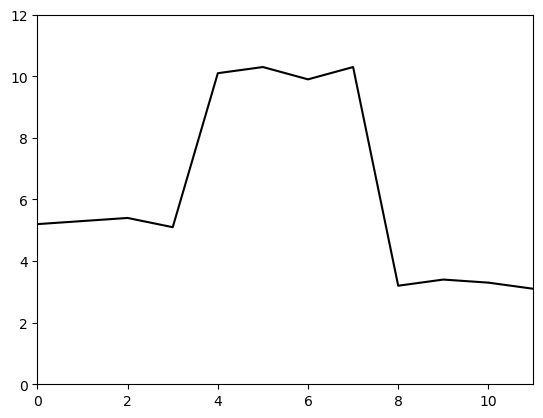

In [3]:
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
plt.show()

In [4]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 1
# as in figure 10.2a-c.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures
def conv_3_1_1_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    # TODO -- write this function
    # replace this line
    for i in range(len(x_out)):
        
        if i == 0:
            prodant = 0
        else:
            prodant = x_in[i-1] * omega[0]
            
        if i == len(x_out)-1:
            prodpos = 0
        else:
            prodpos = x_in[i+1] * omega[2]
            
        prodatu = x_in[i] * omega[1] 
        
        x_out[i] = prodant + prodatu + prodpos
            
            



    return x_out

Now let's see what kind of things convolution can do
First, it can average nearby values, smoothing the function:

Sum of output is 71.1, should be 71.1


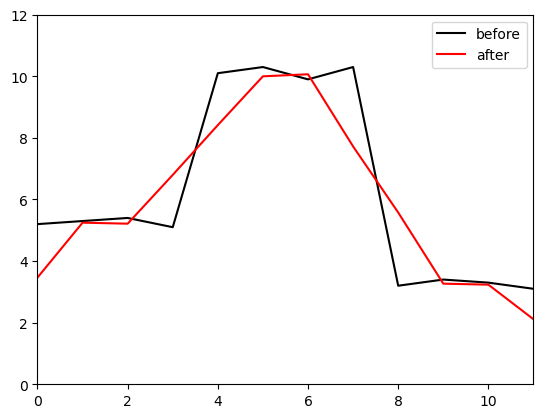

In [5]:

omega = [0.33,0.33,0.33]
h = conv_3_1_1_zp(x, omega)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h):3.3}, should be 71.1")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

In [6]:
h

array([ 3.465,  5.247,  5.214,  6.798,  8.415,  9.999, 10.065,  7.722,
        5.577,  3.267,  3.234,  2.112])

Notice how the red function is a smoothed version of the black one as it has averaged adjacent values.  The first and last outputs are considerably lower than the original curve though.  Make sure that you understand why!<br><br>

With different weights, the convolution can be used to find sharp changes in the function:

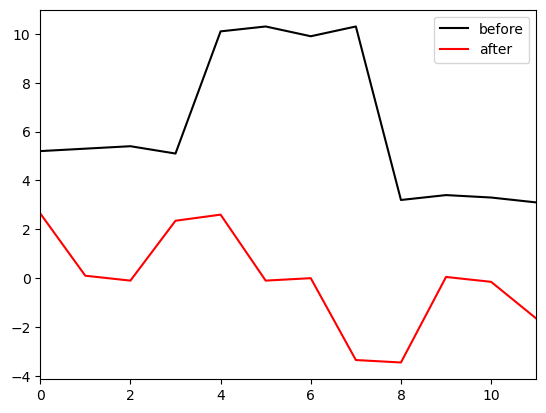

In [7]:

omega = [-0.5,0,0.5]
h2 = conv_3_1_1_zp(x, omega)

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h2, 'r-',label='after')
ax.set_xlim(0,11)
# ax.set_ylim(0, 12)
ax.legend()
plt.show()

Notice that the convolution has a peak where the original function went up and trough where it went down.  It is roughly zero where the function is locally flat.  This convolution approximates a derivative. <br> <br>

Now let's define the convolutions from figure 10.3.  

In [48]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 2, and a dilation of 1
# as in figure 10.3a-b.  Write it yourself, don't call a library routine!
def conv_3_2_1_zp_v1(x_in, omega):
    x_out = np.zeros(int(np.ceil(len(x_in)/2)))
    # TODO -- write this function
    # replace this line
    
    #print("x_in=",x_in)
    
    j = 0
    
    for i in range(0,len(x_out)):
        
        #print("posic out=",i)
        #print("posic in=",j)
        
        if j == 0:
            prodant = 0
        else:
            prodant = x_in[j-1] * omega[0]
            
        if j < len(x_out)-1:
            prodpos = x_in[j+1] * omega[2]
            prodatu = x_in[j] * omega[1]
        elif j == len(x_out)-1:
            prodpos = 0
            prodatu = x_in[j] * omega[1]
        else:
            prodpos = 0
            prodatu = 0
            
        x_out[i] = prodant + prodatu + prodpos
        
        j += 2

    return x_out

In [8]:
def conv_3_2_1_zp_v2(x_in, omega):
    x_out = np.zeros(int(np.ceil(len(x_in)/2)))

    for i in range(len(x_out)):
        # Calculate the indices for the convolution operation
        start_idx = i * 2
        end_idx = min(start_idx + 3, len(x_in))
        
        # Apply convolution operation with zero-padding
        x_slice = x_in[start_idx:end_idx]
        result = np.sum(x_slice * np.array(omega[:len(x_slice)]))
        x_out[i] = result

    return x_out

In [11]:
def conv_3_2_1_zp(x_in, omega):
    x_out = np.zeros(int(np.ceil(len(x_in)/2)))
    # TODO -- write this function
    # replace this line
    
    j = 0
    
    for i in range(len(x_out)):
        
        if j == 0:
            prodant = 0
        else:
            prodant = omega[0] * x_in[j-1]
            
        prodatu = omega[1] * x_in[j]    
            
        if j == len(x_in)-1:
            prodpos = 0
        else:
            prodpos = omega[2] * x_in[j+1]
        
        x_out[i] = prodant + prodatu + prodpos
        
        j += 2

    return x_out

In [12]:
omega = [0.33,0.33,0.33]
h3 = conv_3_2_1_zp(x, omega)

# If you have done this right, the output length should be six and it should
# contain every other value from the original convolution with stride 1
print(h)
print(h3)

[ 3.465  5.247  5.214  6.798  8.415  9.999 10.065  7.722  5.577  3.267
  3.234  2.112]
[ 3.465  5.214  8.415 10.065  5.577  3.234]


In [21]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 5, a stride of 1, and a dilation of 1
# as in figure 10.3c.  Write it yourself, don't call a library routine!
def conv_5_1_1_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    # TODO -- write this function
    # replace this line
    centro_kernel = ((1 + len(omega)) // 2) - 1
    
    for i in range(len(x_out)):
        
        #print("i=",i)
        
        prodatu = omega[centro_kernel] * x_in[i]
        
        if i==0:
            prodant = 0
        elif i==1:
            prodant = omega[centro_kernel-1] * x_in[i-1]
        else:
            prodant = (omega[centro_kernel-1] * x_in[i-1]) + (omega[centro_kernel-2] * x_in[i-2])
        
        if i==len(x_in)-1:
            prodpos = 0
        elif i==len(x_in)-2:
            prodpos = omega[centro_kernel+1] * x_in[i+1]
        else:
            prodpos = (omega[centro_kernel+1] * x_in[i+1]) + (omega[centro_kernel+2] * x_in[i+2])
        
        x_out[i] = prodant + prodatu + prodpos



    return x_out

Sum of output is 69.6, should be 69.6


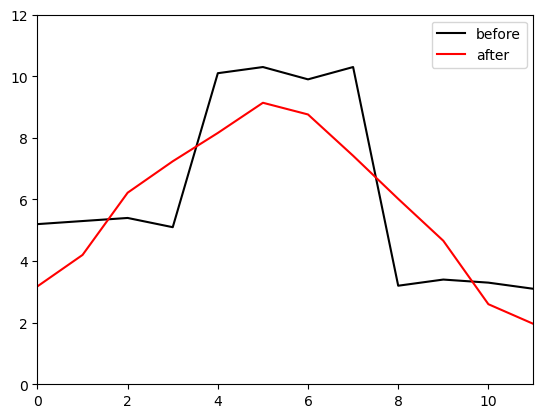

In [22]:

omega2 = [0.2, 0.2, 0.2, 0.2, 0.2]
h4 = conv_5_1_1_zp(x, omega2)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h4):3.3}, should be 69.6")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h4, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

In [29]:
# Finally let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 2
# as in figure 10.3d.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures
def conv_3_1_2_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    # TODO -- write this function
    # replace this line
    omegad = []
    for i in range(len(omega)):
        omegad.append(omega[i])
        if (i < len(omega)-1):
            omegad.append(0)
    
    x_out = conv_5_1_1_zp(x_in, omegad)
    
    return x_out

Sum of output is 68.3, should be 68.3


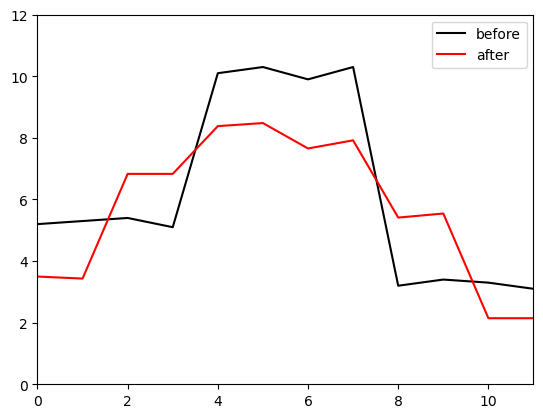

In [30]:
omega = [0.33,0.33,0.33]
h5 = conv_3_1_2_zp(x, omega)

# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h5):3.3}, should be 68.3")

# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h5, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

Finally, let's investigate representing convolutions as full matrices, and show we get the same answer.

In [47]:
# Compute matrix in figure 10.4 d
def get_conv_mat_3_1_1_zp(n_out, omega):
  omega_mat = np.zeros((n_out,n_out))
  # TODO Fill in this matix
  # Replace this line:
  x_out = np.zeros_like(x)
    
  for i in range(len(x_out)):
        
        if i == 0:
            prodant = 0
        else:
            prodant = x[i-1] * omega[0]
            omega_mat[i,i-1] = omega[0]
            
        if i == len(x_out)-1:
            prodpos = 0
        else:
            prodpos = x[i+1] * omega[2]
            omega_mat[i,i+1] = omega[2]
            
        prodatu = x[i] * omega[1] 
        omega_mat[i,i] = omega[1]
        
        



  return omega_mat

In [48]:
# Run original convolution
omega = np.array([-1.0,0.5,-0.2])
h6 = conv_3_1_1_zp(x, omega)
print(h6)

[ 1.54 -3.63 -3.62 -4.87 -2.11 -6.93 -7.41 -5.39 -9.38 -2.16 -2.37 -1.75]


In [50]:
# If you have done this right, you should get the same answer
omega_mat = get_conv_mat_3_1_1_zp(len(x), omega)
h7 = np.matmul(omega_mat, x)
print(h7)

[ 1.54 -3.63 -3.62 -4.87 -2.11 -6.93 -7.41 -5.39 -9.38 -2.16 -2.37 -1.75]


TODO:  What do you expect to happen if we apply the last convolution twice?  Can this be represented as a single convolution? [YES] If so, then what is it? conv_mat_3_1_1

In [51]:
omega_mat = get_conv_mat_3_1_1_zp(len(x), omega)
omega_mat2 = get_conv_mat_3_1_1_zp(len(x), omega)
h7 = np.matmul(omega_mat2, x)
print(h7)

[ 1.54 -3.63 -3.62 -4.87 -2.11 -6.93 -7.41 -5.39 -9.38 -2.16 -2.37 -1.75]


In [52]:
print(omega_mat)

[[ 0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5]]


In [53]:
print(omega_mat2)

[[ 0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5 -0.2]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.5]]
